In [39]:
#######################################################
#********** ASSIGNMENT :CREDIT SCORING ***************#
#*********** ST: NAME: DINU WIJAYAWEERA *************#
#*********** PROF: Prof Dr. Wouter Verbeke  *********#
######################################################

#### References : 
* Statistics and Machine Learning for marketing notes
* Blue courses Basic Credit Risk Modeling for Basel/IFRS 9 using R/Python/SAS: https://www.bluecourses.com/courses/
* Introduction to Credit scoring and scorecard : https://rpubs.com/chidungkt/442168
* Survival Analysis : https://www.r-bloggers.com/steps-to-perform-survival-analysis-in-r/
* Score card Module : https://cran.r-project.org/web/packages/scorecard/scorecard.pdf


### Import libraries

In [1]:
# Data processing library
library(data.table)       # Data manipulation
library(readxl)             #Excel 
library(plyr)             # Data manipulation
library(dataPreparation)  # Data preparation library
library(woeBinning)       # Decision tree–based binning for numerical and categorical variables
library(dplyr)            # Data Manipulation
library(scorecard)       # Specific for score card creation

# Machine learning library
library(mlr)          # Machine learning framework
library(caret)         # Data processing and machine learning framework

Warning message:
"package 'data.table' was built under R version 3.6.1"Warning message:
"package 'readxl' was built under R version 3.6.1"Warning message:
"package 'plyr' was built under R version 3.6.1"Warning message:
"package 'dataPreparation' was built under R version 3.6.3"Loading required package: lubridate
Warning message:
"package 'lubridate' was built under R version 3.6.1"
Attaching package: 'lubridate'

The following object is masked from 'package:plyr':

    here

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from 'package:base':

    date

Loading required package: stringr
Warning message:
"package 'stringr' was built under R version 3.6.1"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.2"Loading required package: progress
Warning message:
"package 'progress' was built under R version 3.6.1"Erro

ERROR: Error: package 'progress' could not be loaded


In [ ]:
#install.packages("devtools", dependencies = TRUE)
#library(devtools)
#remotes::update_packages("rlang")
#devtools::install_github("ayhandis/creditR")
#library(creditR)

In [ ]:
#remotes::update_packages("rlang")


### Data Exploration and Preprocessing

Read in the data


In [2]:
#Set working directory
setwd("C:/Users/dwijayaweera/Documents/2nd-Credit Scoring") 


In [3]:
#Read in the two data files
accepts <- read_excel("ACCEPTS.xlsx") 
rejects <- read_excel("REJECTS.xlsx") 

Check the structure and explore the Accepts data set

In [4]:
str(accepts)

Classes 'tbl_df', 'tbl' and 'data.frame':	10000 obs. of  19 variables:
 $ ID                 : num  250263 250290 250249 249516 249827 ...
 $ V1                 : num  1 1 2 3 1 1 2 1 2 3 ...
 $ V2                 : num  1 2 3 3 3 3 4 3 5 3 ...
 $ V3                 : num  11 6 11 10 5 11 11 12 11 14 ...
 $ V4                 : num  5 4 5 4 2 2 5 3 5 1 ...
 $ V5                 : num  6 5 7 2 4 5 7 3 1 4 ...
 $ V6                 : num  7 1 7 4 4 4 7 5 7 4 ...
 $ V7                 : num  1 1 1 1 1 3 3 1 1 3 ...
 $ V8                 : chr  "2" "2" "2" "2" ...
 $ Has_FICO           : num  0 1 1 0 0 0 1 0 0 0 ...
 $ Business_channel   : num  1 1 1 1 1 2 1 2 1 1 ...
 $ Days_late          : num  0 0 0 168 0 0 0 0 336 0 ...
 $ FICO_Score         : num  NA 1.498 -0.242 NA NA ...
 $ Loan_amount        : num  1.439 0.205 -0.853 -0.676 -0.412 ...
 $ Monthly_income     : num  -0.2591 0.3833 -0.7324 -0.0573 -0.5746 ...
 $ Age                : num  1.781 1.107 1.407 0.957 -0.39 ...
 $ Gearing_coe

In [5]:
#Change name of Default
names(accepts)[19] <- "Bad_creditability"
colnames(accepts)

[1] "ID"                  "V1"                  "V2"                 
 [4] "V3"                  "V4"                  "V5"                 
 [7] "V6"                  "V7"                  "V8"                 
[10] "Has_FICO"            "Business_channel"    "Days_late"          
[13] "FICO_Score"          "Loan_amount"         "Monthly_income"     
[16] "Age"                 "Gearing_coefficient" "Max_gearing_ratio"  
[19] "Bad_creditability"

In [6]:
# Check missing value
apply(is.na(accepts), 2, sum)

ID                  V1                  V2                  V3 
                  0                   0                   0                   0 
                 V4                  V5                  V6                  V7 
                  0                   0                   0                   0 
                 V8            Has_FICO    Business_channel           Days_late 
                  0                   0                   0                   0 
         FICO_Score         Loan_amount      Monthly_income                 Age 
               4472                   0                   0                   0 
Gearing_coefficient   Max_gearing_ratio   Bad_creditability 
                  0                   0                   0

In [25]:
# Apply zero for missing values FICO Score assuming there is no scoring given for the particular customer
accepts$FICO_Score[is.na(accepts$FICO_Score)] <- 0

# check if there are missing values with Has_FICO condition: subset(accepts, Has_FICO==1 & FICO_Score==0)

In [26]:
#Convert to appropriate data types for better performance of the model
accepts$V8<-as.factor(accepts$V8)
accepts$Business_channel<-as.factor(accepts$Business_channel)
accepts$Bad_creditability<-as.factor(accepts$Bad_creditability)

accepts$FICO_Score<-as.double(accepts$FICO_Score)
accepts$Loan_amount<-as.double(accepts$Loan_amount)
accepts$Monthly_income<-as.double(accepts$Monthly_income)
accepts$Age<-as.double(accepts$Age)
accepts$Gearing_coefficient<-as.double(accepts$Gearing_coefficient)
accepts$Max_gearing_ratio<-as.double(accepts$Max_gearing_ratio)

In [27]:
#checking the changes
accepts$Business_channel<-as.factor(accepts$Business_channel)
str(accepts)
tail(accepts)


Classes 'tbl_df', 'tbl' and 'data.frame':	10000 obs. of  19 variables:
 $ ID                 : num  250263 250290 250249 249516 249827 ...
 $ V1                 : num  1 1 2 3 1 1 2 1 2 3 ...
 $ V2                 : num  1 2 3 3 3 3 4 3 5 3 ...
 $ V3                 : num  11 6 11 10 5 11 11 12 11 14 ...
 $ V4                 : num  5 4 5 4 2 2 5 3 5 1 ...
 $ V5                 : num  6 5 7 2 4 5 7 3 1 4 ...
 $ V6                 : num  7 1 7 4 4 4 7 5 7 4 ...
 $ V7                 : num  1 1 1 1 1 3 3 1 1 3 ...
 $ V8                 : Factor w/ 5 levels ">4","1","2","3",..: 3 3 3 3 4 5 2 4 2 2 ...
 $ Has_FICO           : num  0 1 1 0 0 0 1 0 0 0 ...
 $ Business_channel   : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 2 1 2 1 1 ...
 $ Days_late          : num  0 0 0 168 0 0 0 0 336 0 ...
 $ FICO_Score         : num  0 1.498 -0.242 0 0 ...
 $ Loan_amount        : num  1.439 0.205 -0.853 -0.676 -0.412 ...
 $ Monthly_income     : num  -0.2591 0.3833 -0.7324 -0.0573 -0.5746 ...
 $ Age        

ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,Days_late,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Bad_creditability
305925,1,5,1,3,2,4,1,4,1,1,0,-0.4654338,-0.3239198,-0.09003297,-0.3154671,-1.4266242,0.5139798,0
305892,4,4,10,4,3,4,3,2,1,1,0,0.7649334,-0.5001636,-0.18019389,-0.6898434,-0.9591988,0.5139798,0
302908,3,3,2,4,1,4,3,1,0,1,76,0.0000000,0.5572989,-0.08665193,-1.0642196,-0.7165464,0.5139798,1
305940,1,5,11,5,7,7,1,2,1,1,0,-0.3908661,0.1695627,-0.53182147,1.6312894,1.0931303,-0.7686307,0
305957,2,1,2,1,4,4,1,1,1,2,0,-1.0246916,-0.5882855,0.61547622,1.5564142,1.1172536,1.7965902,0
305891,3,4,11,2,4,5,1,1,0,1,0,0.0000000,-0.3239198,-0.60507722,1.3317884,-0.1776024,-0.7686307,0


Drop the column Days_late and as it is not available initially when a customer applies for a loan.
The Gearing_coefficient shall not be removed assuming it could be calculated prior to getting the loan (loan installment calculation vs the income of the customer).


In [30]:
#Drop Days_late

accepts<-accepts[-c(12)]
head(accepts)

ID,V1,V2,V3,V4,V5,V6,V7,V8,Has_FICO,Business_channel,FICO_Score,Loan_amount,Monthly_income,Age,Gearing_coefficient,Max_gearing_ratio,Bad_creditability
250263,1,1,11,5,6,7,1,2,0,1,0.0000000,1.4385177,-0.25908469,1.7810399,0.8602691,0.5139798,0
250290,1,2,6,4,5,1,1,2,1,1,1.4981826,0.2048114,0.38331185,1.1071627,-0.7182492,1.7965902,0
250249,2,3,11,5,7,7,1,2,1,1,-0.2417306,-0.8526511,-0.73242952,1.4066637,1.1229297,-0.7686307,0
249516,3,3,10,4,2,4,1,2,0,1,0.0000000,-0.6764074,-0.05734964,0.9574122,-1.7024817,0.5139798,1
249827,1,3,5,2,4,4,1,3,0,1,0.0000000,-0.4120417,-0.57464791,-0.3903424,0.9100767,-0.7686307,0
250329,1,3,11,2,5,4,3,4,0,2,0.0000000,0.5572989,-0.21062320,-0.3903424,-0.3844956,0.5139798,0


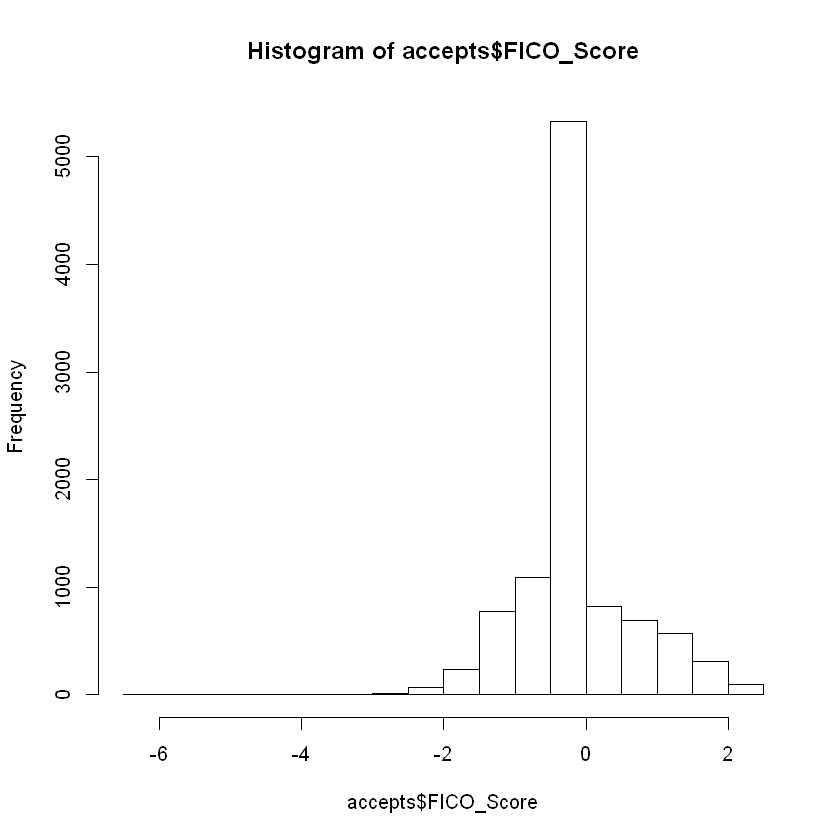

In [145]:
#Investigate distribution of the FICO Score
hist(accepts$FICO_Score)

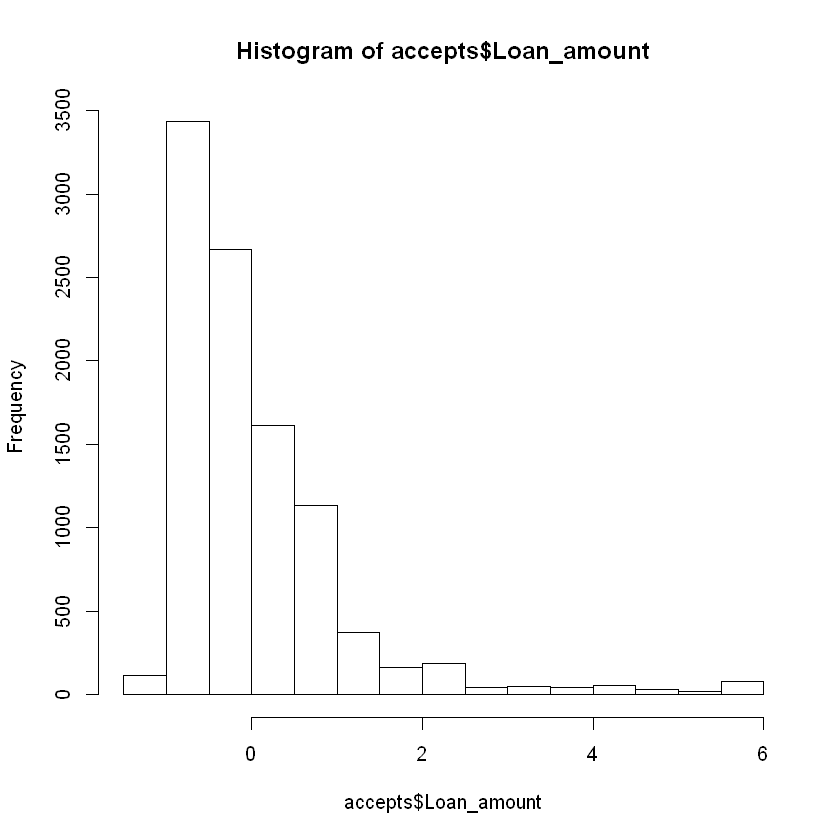

In [146]:
#Investigate distribution of loan amount
hist(accepts$Loan_amount)

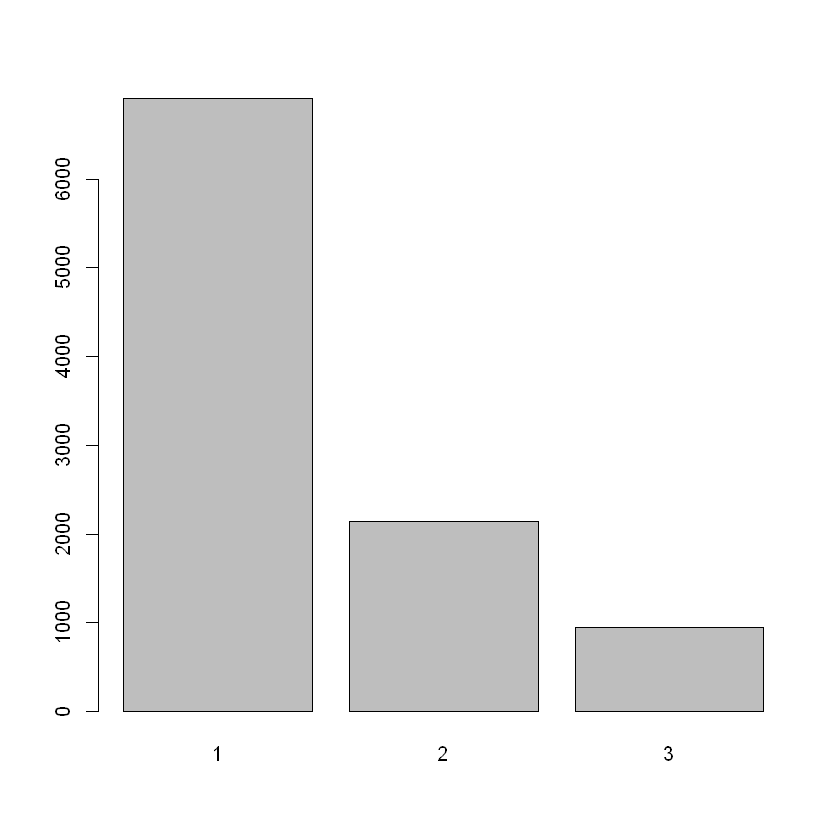

In [147]:
#Check the popular business channels 1 = via branch of financial institution, 2 = via partner retailer, 3 = broker
plot(accepts$Business_channel)

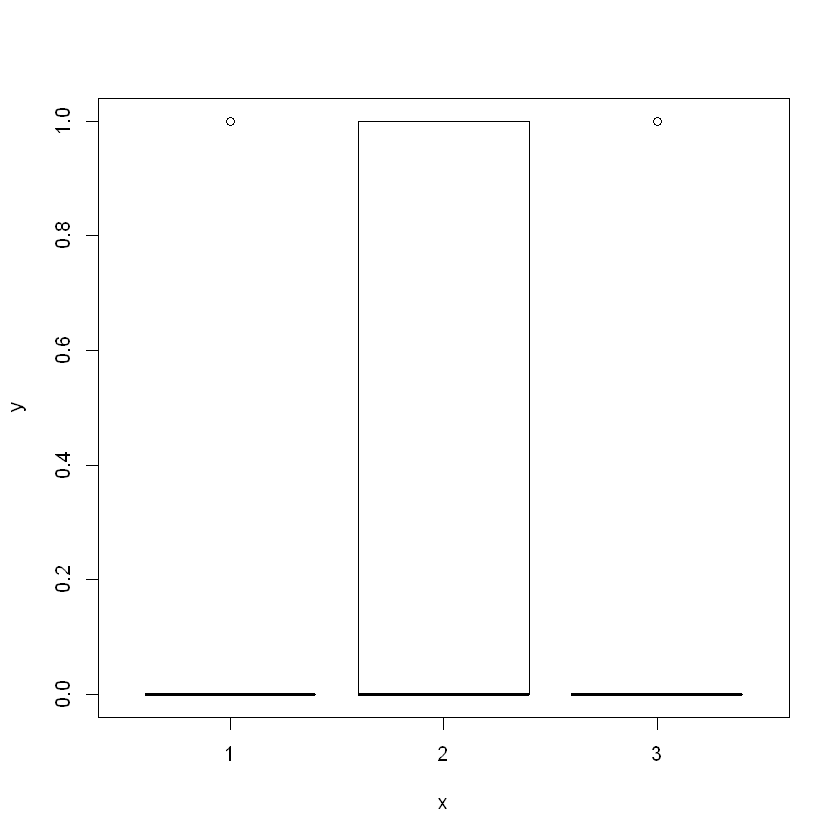

In [148]:
#Compare channels with creditability where 1 = bad

plot(accepts$Business_channel, accepts$Bad_creditability)

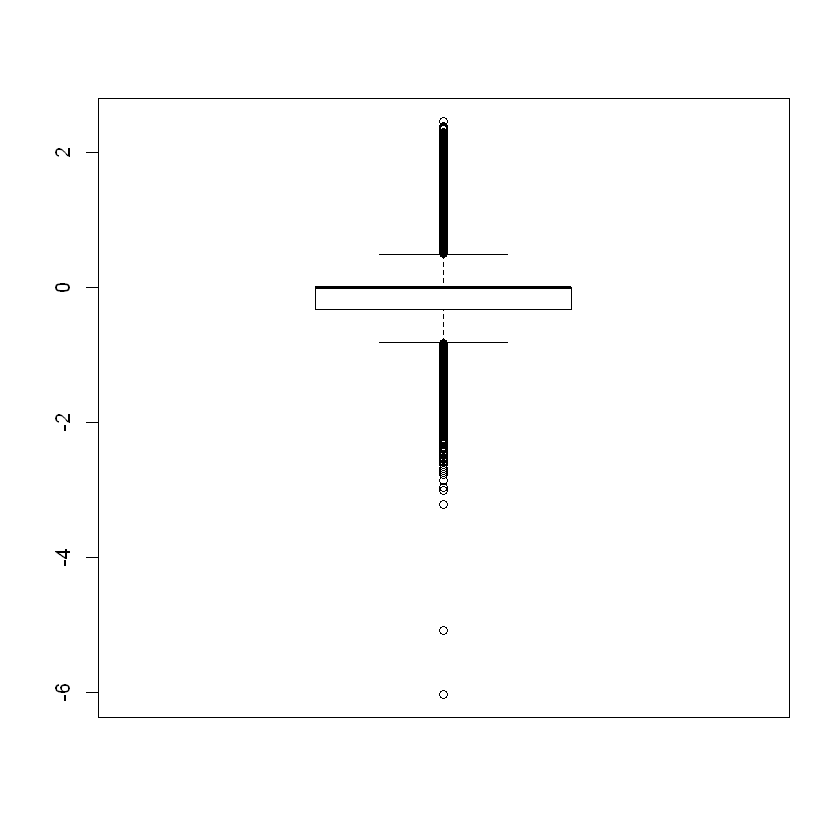

In [156]:
#There are outliers in FICO Score yet we assume that they are correct as it is provided by responsible instituitions
boxplot(accepts$FICO_Score)

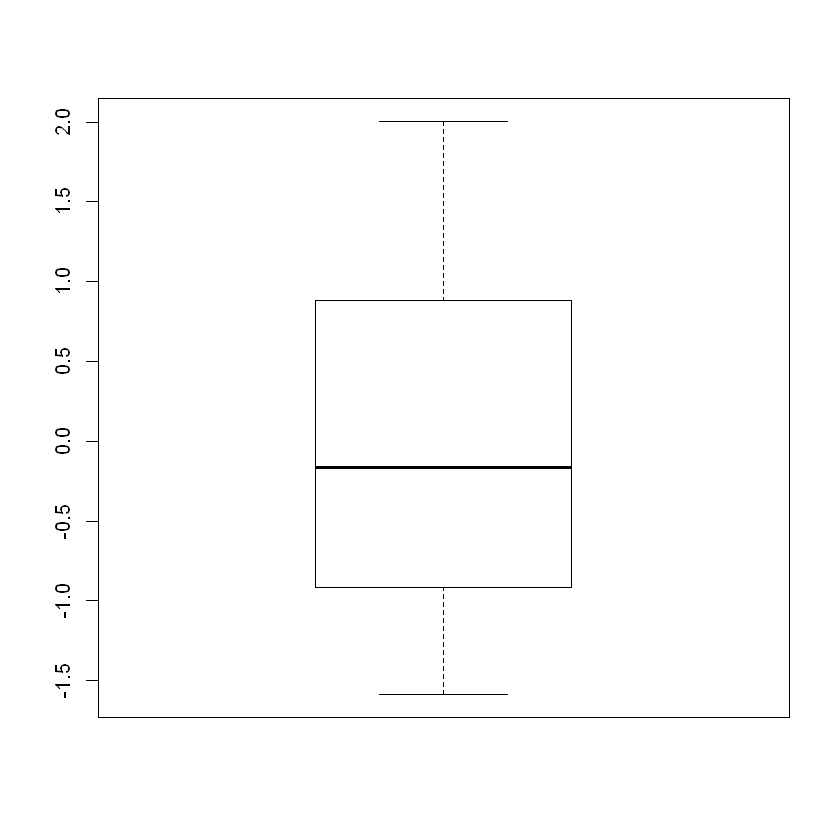

In [31]:
# Check if there are outliers in age
boxplot(accepts$Age)

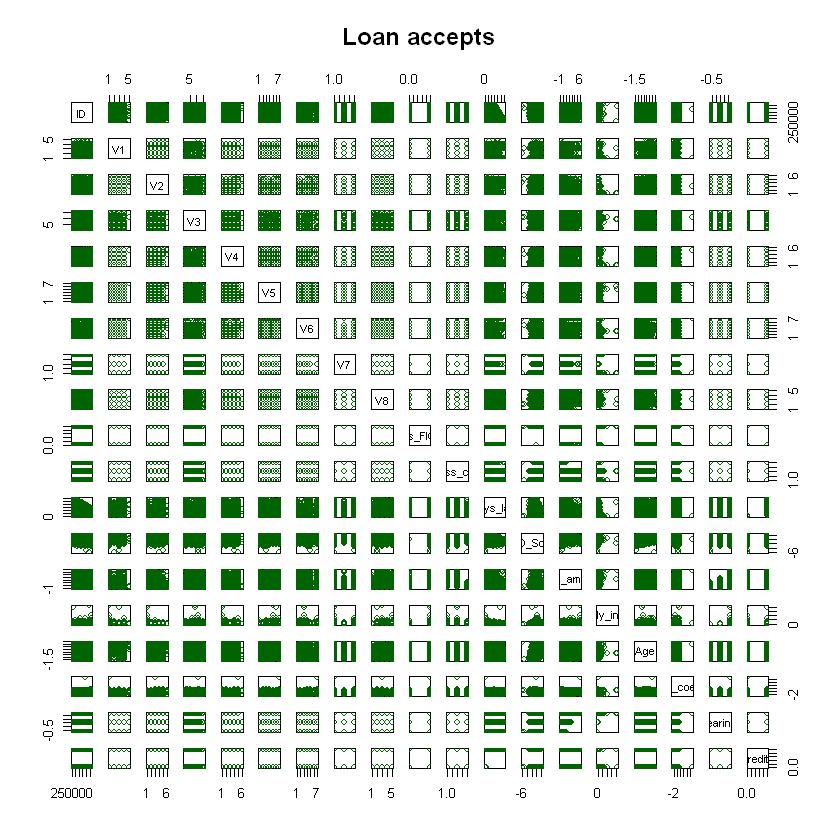

In [141]:
#Plot the data to explore the pattern of the data
plot(accepts,
  main="Loan accepts",
  col="dark green")

Warning message in plot.window(xlim, ylim, log = log, ...):
""breaks" is not a graphical parameter"Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
""breaks" is not a graphical parameter"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""breaks" is not a graphical parameter"Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
""breaks" is not a graphical parameter"

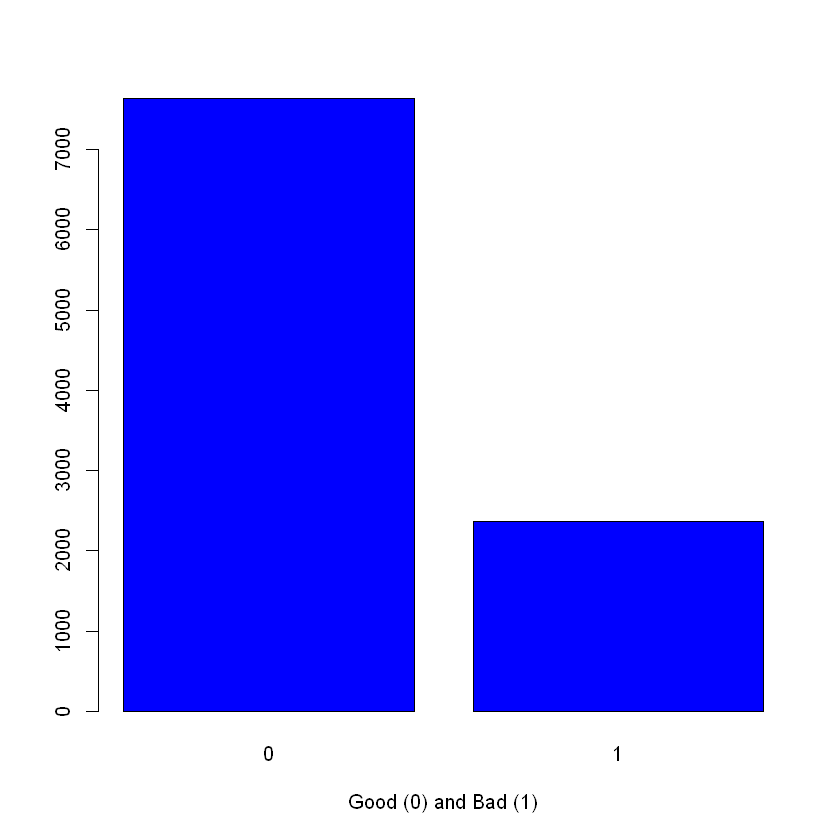

In [142]:
# Plot the target variable of bad creditability 
plot(as.factor(accepts$Bad_creditability), breaks=2, 
     xlab="Good (0) and Bad (1)", col="blue")

In [88]:
accepts$Default<-as.numeric(accepts$Default)

### Exploring Rejects data set

In [32]:
str(rejects)

Classes 'tbl_df', 'tbl' and 'data.frame':	5000 obs. of  17 variables:
 $ ID                 : num  305932 305764 305971 305664 305639 ...
 $ V1                 : num  3 1 1 1 1 3 1 1 1 1 ...
 $ V2                 : num  3 4 4 5 4 3 5 3 4 3 ...
 $ V3                 : num  14 7 10 14 15 10 10 10 2 10 ...
 $ V4                 : num  2 1 4 2 1 1 4 4 2 4 ...
 $ V5                 : num  1 6 5 2 5 4 2 3 6 5 ...
 $ V6                 : num  5 4 4 5 4 5 4 4 4 4 ...
 $ V7                 : num  1 1 1 3 1 3 3 3 1 1 ...
 $ V8                 : chr  "1" "2" "4" "3" ...
 $ Has_FICO           : num  1 1 1 1 1 1 1 1 0 1 ...
 $ Business_channel   : num  1 1 3 1 2 1 1 1 1 3 ...
 $ FICO_Score         : num  -0.0305 0.7152 0.7649 -1.3478 1.6349 ...
 $ Loan_amount        : num  -0.324 5.668 -0.751 -0.853 3.201 ...
 $ Monthly_income     : num  -0.605 1.3 0.434 -0.49 0.561 ...
 $ Age                : num  -1.064 0.808 -0.39 -0.989 0.583 ...
 $ Gearing_coefficient: num  1.0282 1.0818 -0.9694 1.0463 0.0885 

In [33]:
# Check missing value
apply(is.na(rejects), 2, sum)

ID                  V1                  V2                  V3 
                  0                   0                   0                   0 
                 V4                  V5                  V6                  V7 
                  0                   0                   0                   0 
                 V8            Has_FICO    Business_channel          FICO_Score 
                  0                   0                   0                2086 
        Loan_amount      Monthly_income                 Age Gearing_coefficient 
                  0                   0                   0                   0 
  Max_gearing_ratio 
                  0

In [34]:
# Apply zero for missing values FICO Score assuming there is no scoring given for the particular customer
rejects$FICO_Score[is.na(rejects$FICO_Score)] <- 0

In [35]:
#Convert to appropriate data types for better performance of the model
rejects$V8<-as.factor(rejects$V8)
rejects$FICO_Score<-as.double(rejects$FICO_Score)
rejects$Loan_amount<-as.double(rejects$Loan_amount)
rejects$Monthly_income<-as.double(rejects$Monthly_income)
rejects$Age<-as.double(rejects$Age)
rejects$Gearing_coefficient<-as.double(rejects$Gearing_coefficient)
rejects$Max_gearing_ratio<-as.double(rejects$Max_gearing_ratio)

Seperate in to train and valid(test) sets

In [36]:

set.seed(1001)
train_idx <- caret::createDataPartition(y=accepts$Bad_creditability, p=.7, list=F)
train <- accepts[train_idx, ]  # Train 70%
valid <- accepts[-train_idx, ] # Valid (holdout) 30%




ERROR: Error in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]): namespace 'rlang' 0.3.4 is already loaded, but >= 0.4.0 is required


In [37]:
install.packages("rlang", dependencies = TRUE)

Installing package into 'C:/Users/dwijayaweera/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'rlang' is in use and will not be installed"

In [241]:
# Checking the percentage distribution of target variable in each set
table(train$Bad_creditability)/nrow(train)

table(valid$Bad_creditability)/nrow(valid)


        0         1 
0.7611429 0.2388571 


        0         1 
0.7693333 0.2306667 

In [260]:
# Train and Valid sets are assigned with multiple classes hence need to bring them both to data.frame class
train<-as.data.frame(train)
valid<-as.data.frame(valid)
rejects<-as.data.frame(rejects)
class(valid)

[1] "data.frame"

In [171]:
library(woeBinning)

### Binning categorical data

In [175]:
# Grouping 
#binning_cat <- woe.binning(train, 'Bad_creditability','Business_channel')

In [177]:
#binning_cat

,Group.2,Group.1,woe,iv.total.final,1,0,col.perc.a,col.perc.b,iv.bins
3,3,3,-103.15124,0.2308481,66,590,0.03947368,0.1107357,0.07350769
1,1,1,-16.74588,0.2308481,1028,3873,0.61483254,0.7269144,0.01876910
2,2,2,75.57998,0.2308481,578,865,0.34569378,0.1623498,0.13857130


In [ ]:
# Apply the binning to data
#tmp <- woe.binning.deploy(train, binning_cat, add.woe.or.dum.var='woe')
#head(tmp[, c('Business_channel', 'Business_channel.binned', 'woe.Business_channel.binned')])

In [243]:
subset=select(train,-c(Bad_creditability,ID))
tempbin<-woe.binning(train, 'Bad_creditability',subset)



In [247]:
tempbin

FICO_Score,"111.767375960227 , 0.883598732077406 , -196.243837820688 , NA , -Inf , -0.813416415348776 , 0.292671282103493 , Inf , -0.813416415348776 , 0.292671282103493 , Inf , Missing , 0.658443522222339 , 0.658443522222339 , 0.658443522222339 , 0.658443522222339 , 522 , 1091 , 59 , 0 , 544 , 3446 , 1338 , 0 , 0.312200956937799 , 0.652511961722488 , 0.0352870813397129 , 0 , 0.102102102102102 , 0.646771771771772 , 0.251126126126126 , 0 , 0.234821976972346 , 5.07202456233633e-05, 0.42357082500437 , NA",0.6584435
V5,"66.0182578767961 , -12.3321610432954 , -85.0806202466268 , NA , -Inf , 2 , 5 , Inf , 2 , 5 , Inf , Missing , 0.321821014219708 , 0.321821014219708 , 0.321821014219708 , 0.321821014219708 , 818 , 620 , 234 , 0 , 1347 , 2235 , 1746 , 0 , 0.489234449760766 , 0.370813397129187 , 0.139952153110048 , 0 , 0.252815315315315 , 0.419481981981982 , 0.327702702702703 , 0 , 0.156079793848287 , 0.00600188826153959, 0.159739332109881 , NA",0.321821
Age,"90.3534208342019 , 27.0034058012136 , -72.3349480525163 , NA , -Inf , -1.43859586388513 , 0.208659647290484 , Inf , -1.43859586388513 , 0.208659647290484 , Inf , Missing , 0.267709641329294 , 0.267709641329294 , 0.267709641329294 , 0.267709641329294 , 189 , 1126 , 357 , 0 , 244 , 2739 , 2345 , 0 , 0.113038277511962 , 0.673444976076555 , 0.213516746411483 , 0 , 0.0457957957957958, 0.514076576576577 , 0.440127627627628 , 0 , 0.0607558824843686, 0.0430348956358784, 0.163918863209047 , NA",0.2677096
Business_channel,"3.00000000, 1.00000000, 2.00000000, 3.00000000, 1.00000000, 2.00000000, -103.15123763, -16.74588149, 75.57997803, 0.23084809, 0.23084809, 0.23084809, 66.00000000, 1028.00000000, 578.00000000, 590.00000000, 3873.00000000, 865.00000000, 0.03947368, 0.61483254, 0.34569378, 0.11073574, 0.72691441, 0.16234985, 0.07350769, 0.01876910, 0.13857130",0.2308481
V6,"-11.3675753136515 , 42.8354742381246 , -88.7598256259423 , NA , -Inf , 4 , 5 , Inf , 4 , 5 , Inf , Missing , 0.214575982280682 , 0.214575982280682 , 0.214575982280682 , 0.214575982280682 , 598 , 904 , 170 , 0 , 2135 , 1877 , 1316 , 0 , 0.357655502392345 , 0.54066985645933 , 0.101674641148325 , 0 , 0.400713213213213 , 0.35228978978979 , 0.246996996996997 , 0 , 0.00489461770589653, 0.0806934949279929 , 0.128987869646792 , NA",0.214576
V1,"-33.8906917797262 , 58.6790446345658 , 3.0073065604712 , NA , -Inf , 2 , 3 , Inf , 2 , 3 , Inf , Missing , 0.178851090063942 , 0.178851090063942 , 0.178851090063942 , 0.178851090063942 , 807 , 724 , 141 , 0 , 3609 , 1283 , 436 , 0 , 0.482655502392345 , 0.433014354066986 , 0.0843301435406699 , 0 , 0.677364864864865 , 0.240803303303303 , 0.0818318318318318 , 0 , 0.0659883499018317 , 0.112787608270189 , 7.5131891920906e-05, NA",0.1788511
V4,"17.5801741472297 , -89.3335134038307 , NA , -Inf , 4 , Inf , 4 , Inf , Missing , 0.155043050710658 , 0.155043050710658 , 0.155043050710658 , 1504 , 168 , 0 , 4020 , 1308 , 0 , 0.899521531100478 , 0.100478468899522 , 0 , 0.754504504504504 , 0.245495495495495 , 0 , 0.0254942458187066, 0.129548804891951 , NA",0.1550431
V7,"-28.0045751594282 , 36.5115175405302 , NA , -Inf , 1 , Inf , 1 , Inf , Missing , 0.101386635971526 , 0.101386635971526 , 0.101386635971526 , 813 , 859 , 0 , 3428 , 1900 , 0 , 0.486244019138756 , 0.513755980861244 , 0 , 0.643393393393393 , 0.356606606606607 , 0 , 0.044009014625711 , 0.0573776213458153, NA",0.1013866
V8,"3.000000e+00, 3.000000e+00, 3.000000e+00, 1.000000e+00, 2.000000e+00, 3.000000e+00, 4.000000e+00, 5.000000e+00, 1.000000e+00, 2.000000e+00, -2.454311e+01, -2.454311e+01, -2.454311e+01, 7.231932e+00, 3.490040e+01, 8.364004e-02, 8.364004e-02, 8.364004e-02, 8.364004e-02, 8.364004e-02, 8.490000e+02, 8.490000e+02, 8.490000e+02, 2.800000e+01, 7.950000e+02, 3.458000e+03, 3.458000e+03, 3.458000e+03, 8.300000e+01, 1.787000e+03, 5.077751e-01, 5.077751e-01, 5.077751e-01, 1.674641e-02, 4.754785e-01, 6.490240e-01, 6.490240e-01, 6.490240e-01, 1.557808e-02, 3.353979e-01, 3.466687e-02, 3.466687e-02, 3.466687e-02, 8.449308e-05, 4.888868e-02",

In [248]:
# Plot the binned variables
woe.binning.plot(tempbin)


In [249]:
# Tabulate the binned variables
tabulate.binning <- woe.binning.table(tempbin)
tabulate.binning


,Final.Bin,Total.Count,Total.Distr.,1.Count,0.Count,1.Distr.,0.Distr.,0.Rate,WOE,IV
1,<= -0.8134164153,1066,15.2%,522,544,31.2%,10.2%,51.0%,111.8,0.235
2,<= 0.2926712821,4537,64.8%,1091,3446,65.3%,64.7%,76.0%,0.9,0.000
3,<= Inf,1397,20.0%,59,1338,3.5%,25.1%,95.8%,-196.2,0.424
5,Total,7000,100.0%,1672,5328,100.0%,100.0%,76.1%,NA,0.658
,Final.Bin,Total.Count,Total.Distr.,1.Count,0.Count,1.Distr.,0.Distr.,0.Rate,WOE,IV
1,<= 2,2165,30.9%,818,1347,48.9%,25.3%,62.2%,66.0,0.156
2,<= 5,2855,40.8%,620,2235,37.1%,41.9%,78.3%,-12.3,0.006
3,<= Inf,1980,28.3%,234,1746,14.0%,32.8%,88.2%,-85.1,0.160
5,Total,7000,100.0%,1672,5328,100.0%,100.0%,76.1%,NA,0.322
,Final.Bin,Total.Count,Total.Distr.,1.Count,0.Count,1.Distr.,0.Distr.,0.Rate,WOE,IV


In [193]:
subs<-train

In [327]:
# Deploy the binning solution to the data frame
# (i.e. add binned variables and corresponding WOE variables)
train_woe <- woe.binning.deploy(subs, tempbin,
                                               add.woe.or.dum.var='woe')
# }

In [256]:
# Apply binned values on valid
valid_woe <- woe.binning.deploy(valid, tempbin,
                                               add.woe.or.dum.var='woe')

In [305]:
# Apply binned values on rejects
rejects_woe <- woe.binning.deploy(rejects, tempbin, add.woe.or.dum.var='woe')


ERROR: Error in woe.get.clear.data(rejects_woe, default_flag = "creditability", : could not find function "woe.get.clear.data"


In [328]:
colnames(rejects_woe)
colnames(train_woe)


[1] "ID"                             "V1"                            
 [3] "V2"                             "V3"                            
 [5] "V4"                             "V5"                            
 [7] "V6"                             "V7"                            
 [9] "V8"                             "Has_FICO"                      
[11] "Business_channel"               "FICO_Score"                    
[13] "Loan_amount"                    "Monthly_income"                
[15] "Age"                            "Gearing_coefficient"           
[17] "Max_gearing_ratio"              "FICO_Score.binned"             
[19] "woe.FICO_Score.binned"          "V5.binned"                     
[21] "woe.V5.binned"                  "Age.binned"                    
[23] "woe.Age.binned"                 "Business_channel.binned"       
[25] "woe.Business_channel.binned"    "V6.binned"                     
[27] "woe.V6.binned"                  "V1.binned"                     
[29] "woe.V1.binned"                  "V4.binned"                     
[31] "woe.V4.binned"                  "V7.binned"                     
[33] "woe.V7.binned"                  "V8.binned"                     
[35] "woe.V8.binned"                  "V3.binned"                     
[37] "woe.V3.binned"                  "V2.binned"                     
[39] "woe.V2.binned"                  "Monthly_income.binned"         
[41] "woe.Monthly_income.binned"      "Loan_amount.binned"            
[43] "woe.Loan_amount.binned"         "ID.binned"                     
[45] "woe.ID.binned"                  "Has_FICO.binned"               
[47] "woe.Has_FICO.binned"            "Gearing_coefficient.binned"    
[49] "woe.Gearing_coefficient.binned" "Max_gearing_ratio.binned"      
[51] "woe.Max_gearing_ratio.binned"

[1] "ID"                             "V1"                            
 [3] "V2"                             "V3"                            
 [5] "V4"                             "V5"                            
 [7] "V6"                             "V7"                            
 [9] "V8"                             "Has_FICO"                      
[11] "Business_channel"               "FICO_Score"                    
[13] "Loan_amount"                    "Monthly_income"                
[15] "Age"                            "Gearing_coefficient"           
[17] "Max_gearing_ratio"              "Bad_creditability"             
[19] "FICO_Score.binned"              "woe.FICO_Score.binned"         
[21] "V5.binned"                      "woe.V5.binned"                 
[23] "Age.binned"                     "woe.Age.binned"                
[25] "Business_channel.binned"        "woe.Business_channel.binned"   
[27] "V6.binned"                      "woe.V6.binned"                 
[29] "V1.binned"                      "woe.V1.binned"                 
[31] "V4.binned"                      "woe.V4.binned"                 
[33] "V7.binned"                      "woe.V7.binned"                 
[35] "V8.binned"                      "woe.V8.binned"                 
[37] "V3.binned"                      "woe.V3.binned"                 
[39] "V2.binned"                      "woe.V2.binned"                 
[41] "Monthly_income.binned"          "woe.Monthly_income.binned"     
[43] "Loan_amount.binned"             "woe.Loan_amount.binned"        
[45] "ID.binned"                      "woe.ID.binned"                 
[47] "Has_FICO.binned"                "woe.Has_FICO.binned"           
[49] "Gearing_coefficient.binned"     "woe.Gearing_coefficient.binned"
[51] "Max_gearing_ratio.binned"       "woe.Max_gearing_ratio.binned"

In [329]:
head(iv(train_woe,"Bad_creditability",order=TRUE))

variable,info_value
FICO_Score.binned,0.6584435
woe.FICO_Score.binned,0.6584435
FICO_Score,0.6027446
Monthly_income,0.4705437
Age,0.3838196
Gearing_coefficient,0.3527759


### Fine tuning dataframe before application of the model

In [ ]:
# Get the IV and DV list name
# Dependent variable (DV)
dv_list <- c('Bad_creditability')
# Independent variable (IV)
iv_list <- setdiff(colnames(train_woe), dv_list)  # Exclude the target variable
iv_list <- setdiff(iv_list, 'ID')  # Exclude the client_id

In [ ]:
# Pick out categorical, boolean and numerical variable
iv_cat_list <- c()  # List to store categorical variable
iv_bool_list <- c()  # List to store boolean variable
iv_num_list <- c()  # List to store numerical variable
for (v in iv_list) {
    if (class(train_woe[, v]) == 'factor') {  # Factor == categorical variable
        iv_cat_list <- c(iv_cat_list, v)
    } else if (class(train_woe[, v]) == 'logical') {  # Logical == boolean variable
        iv_bool_list <- c(iv_bool_list, v)
    } else {  # Non-factor + Non-logical == numerical variable
        iv_num_list <- c(iv_num_list, v)
    }
}

In [ ]:
#Drop categorical data as all were processed

for (v in iv_cat_list) {
    # Train, valid, test
    train_woe[, v] <- NULL
    valid_woe[, v] <- NULL
   
    
    # rejects 
    rejects_woe[, v] <- NULL
}

In [ ]:
# Convert boolean to numeric
for (v in iv_bool_list) {
    # Train, valid, test
    train_woe[, v] <- as.numeric(train_woe[, v])
    valid_woe[, v] <- as.numeric(valid_woe[, v])
    
    
    # rejects
    rejects_woe[, v] <- as.numeric(rejects_woe[, v])
}

In [ ]:
#Check infinite values and remove
#Train, valid
sum(apply(sapply(train_woe, is.infinite), 2, sum))
sum(apply(sapply(valid_woe, is.infinite), 2, sum))

# Rejects
sum(apply(sapply(rejects_woe, is.infinite), 2, sum))

In [ ]:
# Impute +/-Inf value by NA
# Train, valid
train_woe[sapply(train_woe, is.infinite)] <- NA
valid_woe[sapply(valid_woe, is.infinite)] <- NA

# Rejects
rejects_woe[sapply(rejects_woe, is.infinite)] <- NA

In [ ]:
# Check missing value
# Train, valid
sum(apply(is.na(train_woe), 2, sum))
sum(apply(is.na(valid_woe), 2, sum))

# Rejects (holdout)
sum(apply(is.na(rejects_woe), 2, sum))

In [ ]:
# Impute missing value in numerical variable by mean
for (v in iv_num_list) {
    # Train, valid, test
    train_woe[is.na(train_woe[, v]), v] <- mean(train_woe[, v], na.rm=T)
    valid_woe[is.na(valid_woe[, v]), v] <- mean(valid_woe[, v], na.rm=T)
    
    
    # Rejects
    rejects_woe[is.na(rejects_woe[, v]), v] <- mean(rejects_woe[, v], na.rm=T)
}

In [292]:
# Check if train and test (holdout) have same variables
# Train, valid, test
dim(train_woe)
dim(valid_woe)
# Test (holdout) - This would have one less column than the above
dim(rejects_woe)

[1] 3000   52

[1] 3000   52

[1] 5000   17

### Variable Selection

In [ ]:
# For variable selection information value is used. This is executed via the Scorecard package
#ls("package:scorecard")
#?var_filter

iv(train_woe,"Bad_creditability",order=TRUE)

In [ ]:
#Remove ID related variables

best_iv_var = var_filter(train_woe, y = "Bad_creditability",var_rm =c("woe.ID.binned","ID"))
dim(best_fs_var)


In [ ]:
#Remove the target variable 

best_iv_var[["Bad_creditability"]] <- NULL


In [ ]:
# Apply variable selection to the data
# Train
var_select <- names(train_woe)[names(train_woe) %in% names(best_iv_var)]
train_processed <- train_woe[, c('ID', var_select,'Bad_creditability')]
# Valid
var_select <- names(valid_woe)[names(valid_woe) %in% names(best_iv_var)]
valid_processed <- valid_woe[, c('ID', var_select,'Bad_creditability')]

# Reject
var_select <- names(rejects_woe)[names(rejects_woe) %in% names(best_iv_var)]
rejects_processed <- rejects_woe[, c('ID', var_select)]

In [ ]:
# Final check if train and test (holdout) have same variables
# Train, valid, test
dim(train_processed)
dim(valid_processed)

# Test (holdout)
dim(rejects_processed)

In [ ]:
#Change type to numeric of woe.Business.binned in rejects as there was a difference when compared with training
rejects_processed$woe.Business_channel.binned<-as.numeric(rejects_processed$woe.Business_channel.binned)


### Model

### Gradient Boosted Tree

In [ ]:
# Fit Gradient Boosted Tree Model
# * Note I had to add mlr:: infront of modelling functions due to those functions being conflicted with other packages

#load GBM
getParamSet("classif.gbm")

#set 5 fold cross validation
rdesc <- mlr::makeResampleDesc("CV",iters = 5)

# Define model - make a learner
learner <- mlr::makeLearner("classif.gbm", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- mlr::makeClassifTask(id="bank_train", data=train_processed[, -1], target="Bad_creditability")


# Set hyper parameter tuning
tune_params <-makeParamSet(
makeDiscreteParam("distribution", values = "bernoulli"),
makeIntegerParam("n.trees", lower = 100, upper = 1000), #number of trees
makeIntegerParam("interaction.depth", lower = 2, upper = 10), #depth of tree
makeNumericParam("shrinkage",lower = 0.01, upper = 1)
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::auc))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- mlr::resample(learner, train_task, rdesc, measures=list(mlr::auc))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

In [ ]:
# Retrain the model with tbe best hyper-parameters
best_md <- mlr::train(best_learner, train_task)

In [ ]:
# Make prediction on valid data
pred <- predict(best_md, newdata=valid_processed[, -1])

In [ ]:
#Check the accuracy

mlr::performance(pred, measures = list(auc, acc, fpr, fnr, f1))

##The accuracy of the model is good however it takes time and it would take more time when trying to predict to a larger dataset

In [ ]:
#####################################################

### Logistic Regression

In [ ]:
# Next, I tried out a fairly simple however an effective model 'Logistic Regression', widely used in the industry.

## * Note : I had to add the package name mlr:: infront due to functions being conflicted with other packages


# Set up cross-validation
# Cross validation is essential in order to make sure we do not overfit the data
rdesc = mlr::makeResampleDesc("CV", iters=5, predict="both")

# Define the model
learner <- mlr::makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- mlr::makeClassifTask(id="bank_train", data=train_processed[, -1], target="Bad_creditability")

# Set hyper parameter tuning
tune_params <- mlr::makeParamSet(
)
ctrl = mlr::makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::auc))
    
    # Extract best model or the one with best performance
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- # Make prediction on valid data
pred <- predict(best_md, newdata=valid_processed[, -1])resample(learner, train_task, rdesc, measures=list(mlr::auc, setAggregation(mlr::auc, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

In [ ]:
# Retrain the model with tbe best hyper-parameters
best_md <- mlr::train(best_learner, train_task)

In [ ]:
# Make prediction on valid data
pred <- predict(best_md, newdata=valid_processed[, -1])


In [ ]:
#Check the accuracy

#mlr::performance(pred, measures=mlr::auc,acc,f1)

mlr::performance(pred, measures = list(auc, acc, fpr, fnr, f1))

 The accuracy, acc and F1 values of the model is good although fpr and fnr is a slightly high
However I pick the ' Logistic Regression' model due to ease of use and because it is less time consuming.
 Because, the time factor would be important in a real business setting.
The GBM takes too much time though it may give better results, hence there is less value addition as time equals costs. 


### Generating predictions on the processed rejects data set

In [ ]:
# Make prediction on reject data

rejects_pred <- predict(best_md, newdata=rejects_processed[, -1])

In [ ]:

# In rejects data we consider .10 above for default probability are defaulting while below may be good creditors
# The reason why I considered the prob.1 rates was that I thought it would help the performance of the model better
# for the reject inference to consider the probabilities derived from the model which used accepts dataset
# However, it may be biased as the model was created using only the accepts data set.

predicted.bad <- as.data.frame(ifelse(rejects_pred$data[['prob.1']]> 0.10, 1, 0))
head(predicted.bad, 30)


In [ ]:
#Assign the same name for the response

names(predicted.bad)[1] <- "Bad_creditability"

In [ ]:

#Checking if the number of rows match the processed rejects data set
dim(predicted.bad)

In [ ]:
#Assigning type factor for bad creditability
predicted.bad$Bad_creditability<-as.factor(predicted.bad$Bad_creditability)


In [ ]:

# Checking if the bad_creditability rate is close to 75% of the dataset as it is the optimal value. 
# It is around 75% data, therefore we can proceed. 

length(predicted.bad$Bad_creditability[predicted.bad$Bad_creditability==1])


In [ ]:
# Binding the values based on the probabilities with the rejects data set
rejects_processed_pred<-cbind(rejects_processed,predicted.bad)

head(rejects_processed_pred)


### Final Training Data 

In [ ]:
######## Preparation of final training data ########

In [ ]:
# Check if dimensions of both datasets are the same
# This makes sure that both sets contains the same variables which is important when binding the two data sets.
dim(rejects_processed_pred)
dim(train_processed)

In [ ]:
# Bind the two data set to create one large training set

total_train<-rbind(train_processed,rejects_processed_pred)

In [ ]:
#Check the final dimensions to see if the merge was a success.
dim(total_train)

## Training the model with both datasets

In [ ]:
# Next I train the model with data set created combining both accepts and rejects data set 
# as this would provide a more realistic prediction,
# when predicting the creditability of the customers

# Set up cross-validation
rdesc = mlr::makeResampleDesc("CV", iters=5, predict="both")

# Define the model
learner <- mlr::makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- mlr::makeClassifTask(id="bank_train", data=total_train[, -1], target="Bad_creditability")

# Set hyper parameter tuning
tune_params <- mlr::makeParamSet(
)
ctrl = mlr::makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
  # Run parameter tuning
  res <- tuneParams(learner, task=train_task, resampling=rdesc,
                    par.set=tune_params, control=ctrl, measures=list(mlr::auc))
  
  # Extract best model
  best_learner <- res$learner
  
} else {
  # Simple cross-validation
  res <- mlr::resample(learner, train_task, rdesc, measures=list(mlr::auc, setAggregation(mlr::auc, train.mean)))
  
  # No parameter for tuning, only 1 best learner
  best_learner <- learner
}


In [ ]:

#train model with best parameters
best_md <- mlr::train(best_learner, train_task)

In [ ]:

# Make prediction on valid data
pred_new <- predict(best_md, newdata=valid_processed[, -1])


In [ ]:

#Check accuracy
#performance(pred, measures=mlr::auc,acc,fpr, fnr, f1)

mlr::performance(pred_new, measures = list(mlr::auc, mlr::acc, mlr::fpr, mlr::fnr, mlr::f1))


#### The auc is 0.753 and has declined slightly with the new model but only by 0.1 however false positive
####  and false negative rate have drastically declined. 
####  In other words, this means that falsely rejecting a null hypothesis has gone down.
####  False positive rate means the number of negative items which are wrongly classified as positive,
#####  in this case as individuals with 'Bad creditability' but are actually 'Good'.
####  while false negative means number which is falsely classified as positive however when it is not,
#####  and in this case individuals who are marked as 'Good' but are actually bad.
####  False positive rate also provides an indication of the significance of the result. (Significance = 1-FPR) 

####  Hence you can see that significance is good with the results and also that it has improved with the latest results.

In [ ]:


#############################################################
##############################################################
################## Survival Analysis #########################
##############################################################

In [ ]:

 #install.packages("survival")
# Loading the package
library("survival")

In [ ]:

#Read in the two data files
credit_s <- read.table("creditsurv.csv", header = T) 
head(credit_s)

In [ ]:

# Investigate the variables 
summary(credit_s)


In [ ]:

#Identify time and status variable to incorporate survival analysis
#Curradd: years at address
#Curremp: years at current work place
#Homephon:  Has home phone or not
#Marstat : Marital status
#Homeowns:  Has home or not


In [ ]:

#Creating survival function for Censore - assuming it's early payment

surv=survfit(Surv(credit_s$Curradd,credit_s$Curremp,credit_s$Homephon,credit_s$Marstat,credit_s$Homeowns,credit_s$Censore == 1)~1)
surv

In [ ]:

#Plot the model to view the probabilities for survival of early payments as time passes
plot(surv)